#### [HOME](../README.md) | [NEXT](1.raw_course_specification.ipynb)

---

# OOP Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Single Feature Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an male insects latitude given the wingspan.

#### Step 1 - Import Dependencies

In [101]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

#### Step 2 - Import and Filter Data

In [102]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = insects[insects.sex != 1]
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Instantiate a LinearRegression Object

In [103]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [104]:
X_insects = insects[['wingsize']]
y_insects = insects['latitude']
insects_regression.fit(X_insects, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [105]:
latitude_predictions = insects_regression.predict(X_insects)

#### Step 5: Plot the Predictions

Text(0, 0.5, 'Predicted Latitude')

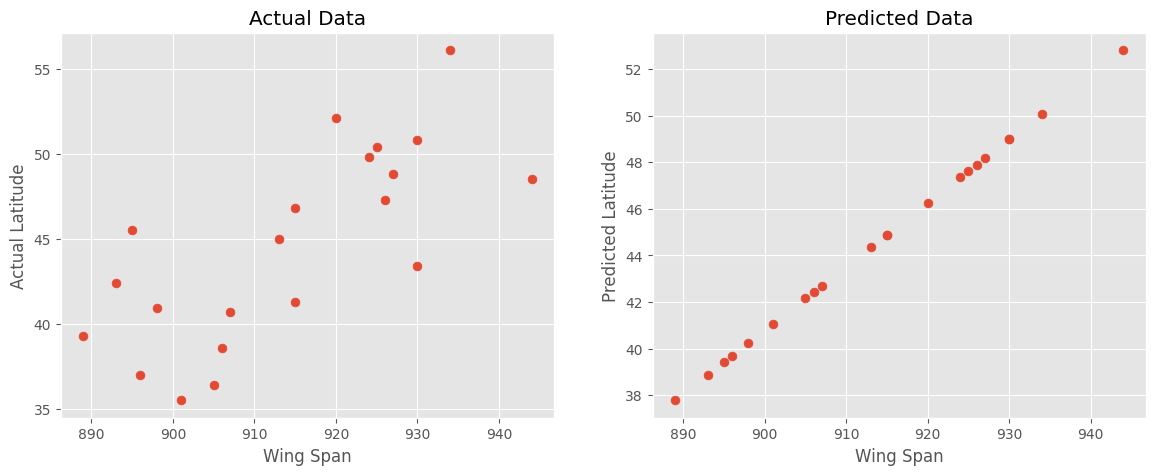

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.wingsize, insects.latitude, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Wing Span")
axs[0].set_ylabel("Actual Latitude")


axs[1].scatter(insects.wingsize, latitude_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Wing Span")
axs[1].set_ylabel("Predicted Latitude")

#### Step 6: Evaluate The Model

In [118]:
table = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': latitude_predictions,
    'Loss': y_insects - insects_regression.predict(X_insects).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

    Target  Predicted result  Loss
0     35.5         41.063461 -5.56
1     37.0         39.698252 -2.70
2     38.6         42.428669 -3.83
3     40.7         42.701710 -2.00
4     40.9         40.244336  0.66
5     42.4         38.879128  3.52
6     45.0         44.339960  0.66
7     46.8         44.886044  1.91
8     48.8         48.162543  0.64
9     49.8         47.343418  2.46
10    50.8         48.981668  1.82
11    36.4         42.155627 -5.76
12    39.3         37.786961  1.51
13    41.3         44.886044 -3.59
14    43.4         48.981668 -5.58
15    45.5         39.425211  6.07
16    47.3         47.889502 -0.59
17    48.5         52.804251 -4.30
18    50.4         47.616460  2.78
19    52.1         46.251252  5.85
20    56.1         50.073835  6.03
The cost or average loss of this model is -1.0150610510858574e-15
